<a href="https://colab.research.google.com/github/priyaadepu/Project-3-DocAssist/blob/main/Docassist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import gradio as gr
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from fpdf import FPDF
import io

In [7]:
from google.colab import files
uploaded = files.upload()

Saving dataset.xlsx to dataset.xlsx


In [8]:
df = pd.read_excel("dataset.xlsx")

In [11]:
# Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB
None
       HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE    LEUCOCYTE  THROMBOCYTE  \
count  3309.000000   3309.000000  3309.000000  3309.000000  3309.000000   
mean     38.226111     12.749350     4.544802     8.715533   258.893019   
std       5.971943      2.084325     0.7

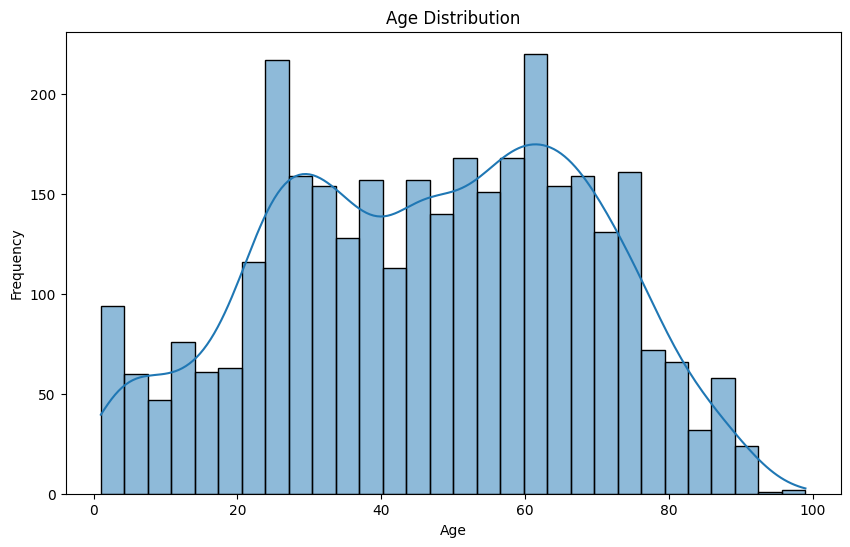

In [12]:
# Visualize the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

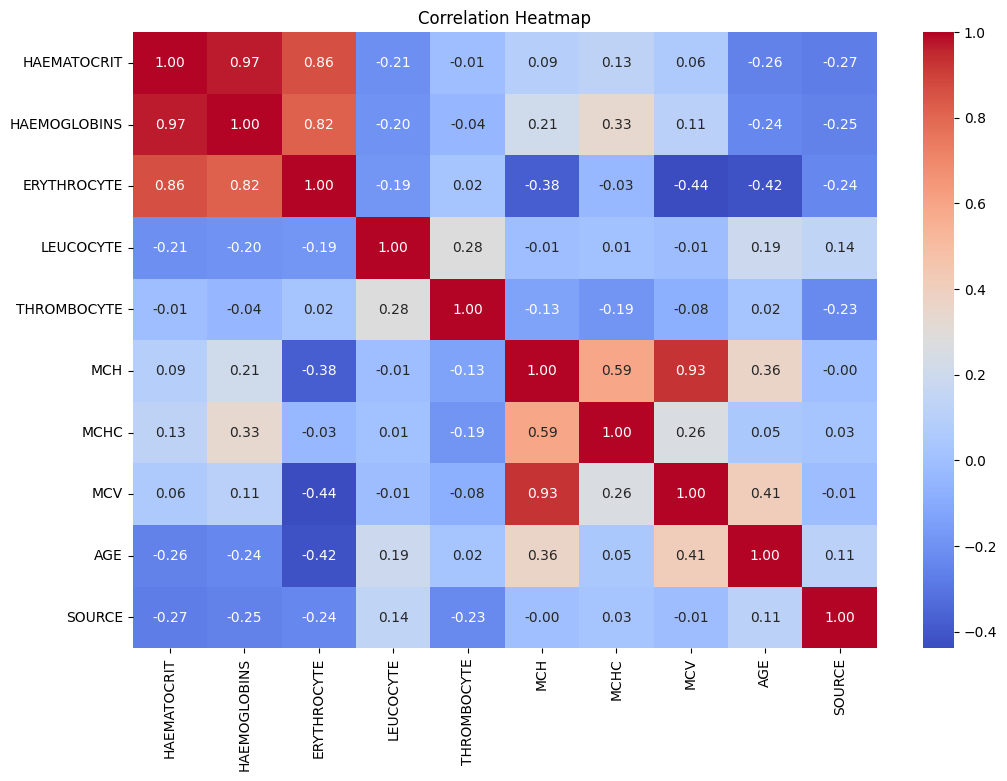

In [13]:
# Visualize the correlation heatmap
plt.figure(figsize=(12, 8))
# Include only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Data Preprocessing
# Handling missing values
df.dropna(inplace=True)

In [15]:
# Encoding categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [16]:
# Splitting data
X = df.drop(columns=['SEX'])  # Assuming 'treatment_outcome' is the target variable
y = df['SEX']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Model Training - Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5923 - loss: 0.6482 - val_accuracy: 0.6752 - val_loss: 0.5923
Epoch 2/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7099 - loss: 0.5693 - val_accuracy: 0.6918 - val_loss: 0.5847
Epoch 3/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7143 - loss: 0.5657 - val_accuracy: 0.6858 - val_loss: 0.5809
Epoch 4/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7280 - loss: 0.5481 - val_accuracy: 0.6903 - val_loss: 0.5786
Epoch 5/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7245 - loss: 0.5436 - val_accuracy: 0.6934 - val_loss: 0.5739
Epoch 6/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7327 - loss: 0.5334 - val_accuracy: 0.6903 - val_loss: 0.5729
Epoch 7/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7297 - loss: 0.5416 - val_accuracy: 0.6934 - val_loss: 0.5725
Epoch 8/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7342 - loss: 0.5206 - val_accuracy: 0.7054 - val_

In [20]:
# Save models and preprocessors
joblib.dump(model, 'rf_model.pkl') # Changed rf_model to model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
nn_model.save('nn_model.h5')

In [21]:

# Model Evaluation
# Load the model first
import joblib
rf_model = joblib.load('rf_model.pkl')

y_pred_rf = rf_model.predict(X_test)
print("RandomForest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("RandomForest Classification Report:\n", classification_report(y_test, y_pred_rf))

RandomForest Accuracy: 0.7054380664652568
RandomForest Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70       310
           1       0.74      0.69      0.71       352

    accuracy                           0.71       662
   macro avg       0.71      0.71      0.71       662
weighted avg       0.71      0.71      0.71       662



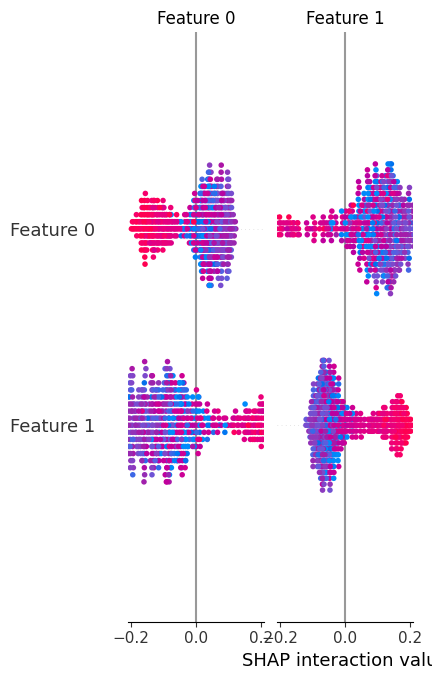

In [22]:
# Model Interpretability
explainer = shap.TreeExplainer(model)  # Instantiate TreeExplainer directly
# Use the 'check_additivity' argument in the 'shap_values' calculation instead
shap_values = explainer.shap_values(X_test, check_additivity=False)
shap.summary_plot(shap_values, X_test)

In [32]:
def ui_predict(HAEMATOCRIT, HAEMOGLOBINS, ERYTHROCYTE, LEUCOCYTE, THROMBOCYTE, MCH, MCHC, MCV, AGE, SOURCE, model_choice):
    pass

In [35]:
# Generate and Save PDF Report
def generate_report():
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="DocAssist Model Evaluation Report", ln=True, align='C')
    pdf.ln(10)
    pdf.multi_cell(0, 10, f"RandomForest Accuracy: {accuracy_score(y_test, y_pred_rf)}\n")
    pdf.multi_cell(0, 10, f"Classification Report:\n{classification_report(y_test, y_pred_rf)}\n")

    # Save PDF file to the current directory instead of '/mnt/data/'
    # You can change 'DocAssist_Report.pdf' to your desired filename
    pdf_path = "DocAssist_Report.pdf"
    pdf.output(pdf_path)

    return pdf_path

# Input components
input_components = [
    gr.Number(label="HAEMATOCRIT"),
    gr.Number(label="HAEMOGLOBINS"),
    gr.Number(label="ERYTHROCYTE"),
    gr.Number(label="LEUCOCYTE"),
    gr.Number(label="THROMBOCYTE"),
    gr.Number(label="MCH"),
    gr.Number(label="MCHC"),
    gr.Number(label="MCV"),
    gr.Number(label="AGE"),
    gr.Number(label="SOURCE"),
]

# Model selector - Changed from gr.inputs.Radio to gr.Radio
model_selector = gr.Radio(["RandomForest", "Neural Network"], label="Select Model")

# Output component (example)
output_component = gr.Textbox(label="Prediction")


# Add a button in the Gradio UI for downloading the report
download_button = gr.File(label="Download Report", value=generate_report())
# User Interface with Gradio
interface = gr.Interface(
    fn=ui_predict,
    inputs=input_components + [model_selector],
    outputs=[output_component, download_button],
    title="DocAssist: Medical Decision Support"
)

interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d9f25c78d5234ee25e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
